# Taller 1

## Objetivo

Evaluar las capacidades del estudiante para realizar análisis de datos utilizando técnicas estadísticas y de visualización que permitan entender un conjunto de datos, descubrir insights y plantear hipótesis de negocio.

## Descripción

Para este taller se utilizará una base de datos de Spotify en donde se encuentran las canciones más escuchadas incluyendo características tanto intrínsecas como extrínsecas de cada canción. A continuación, se relaciona el diccionario de datos:

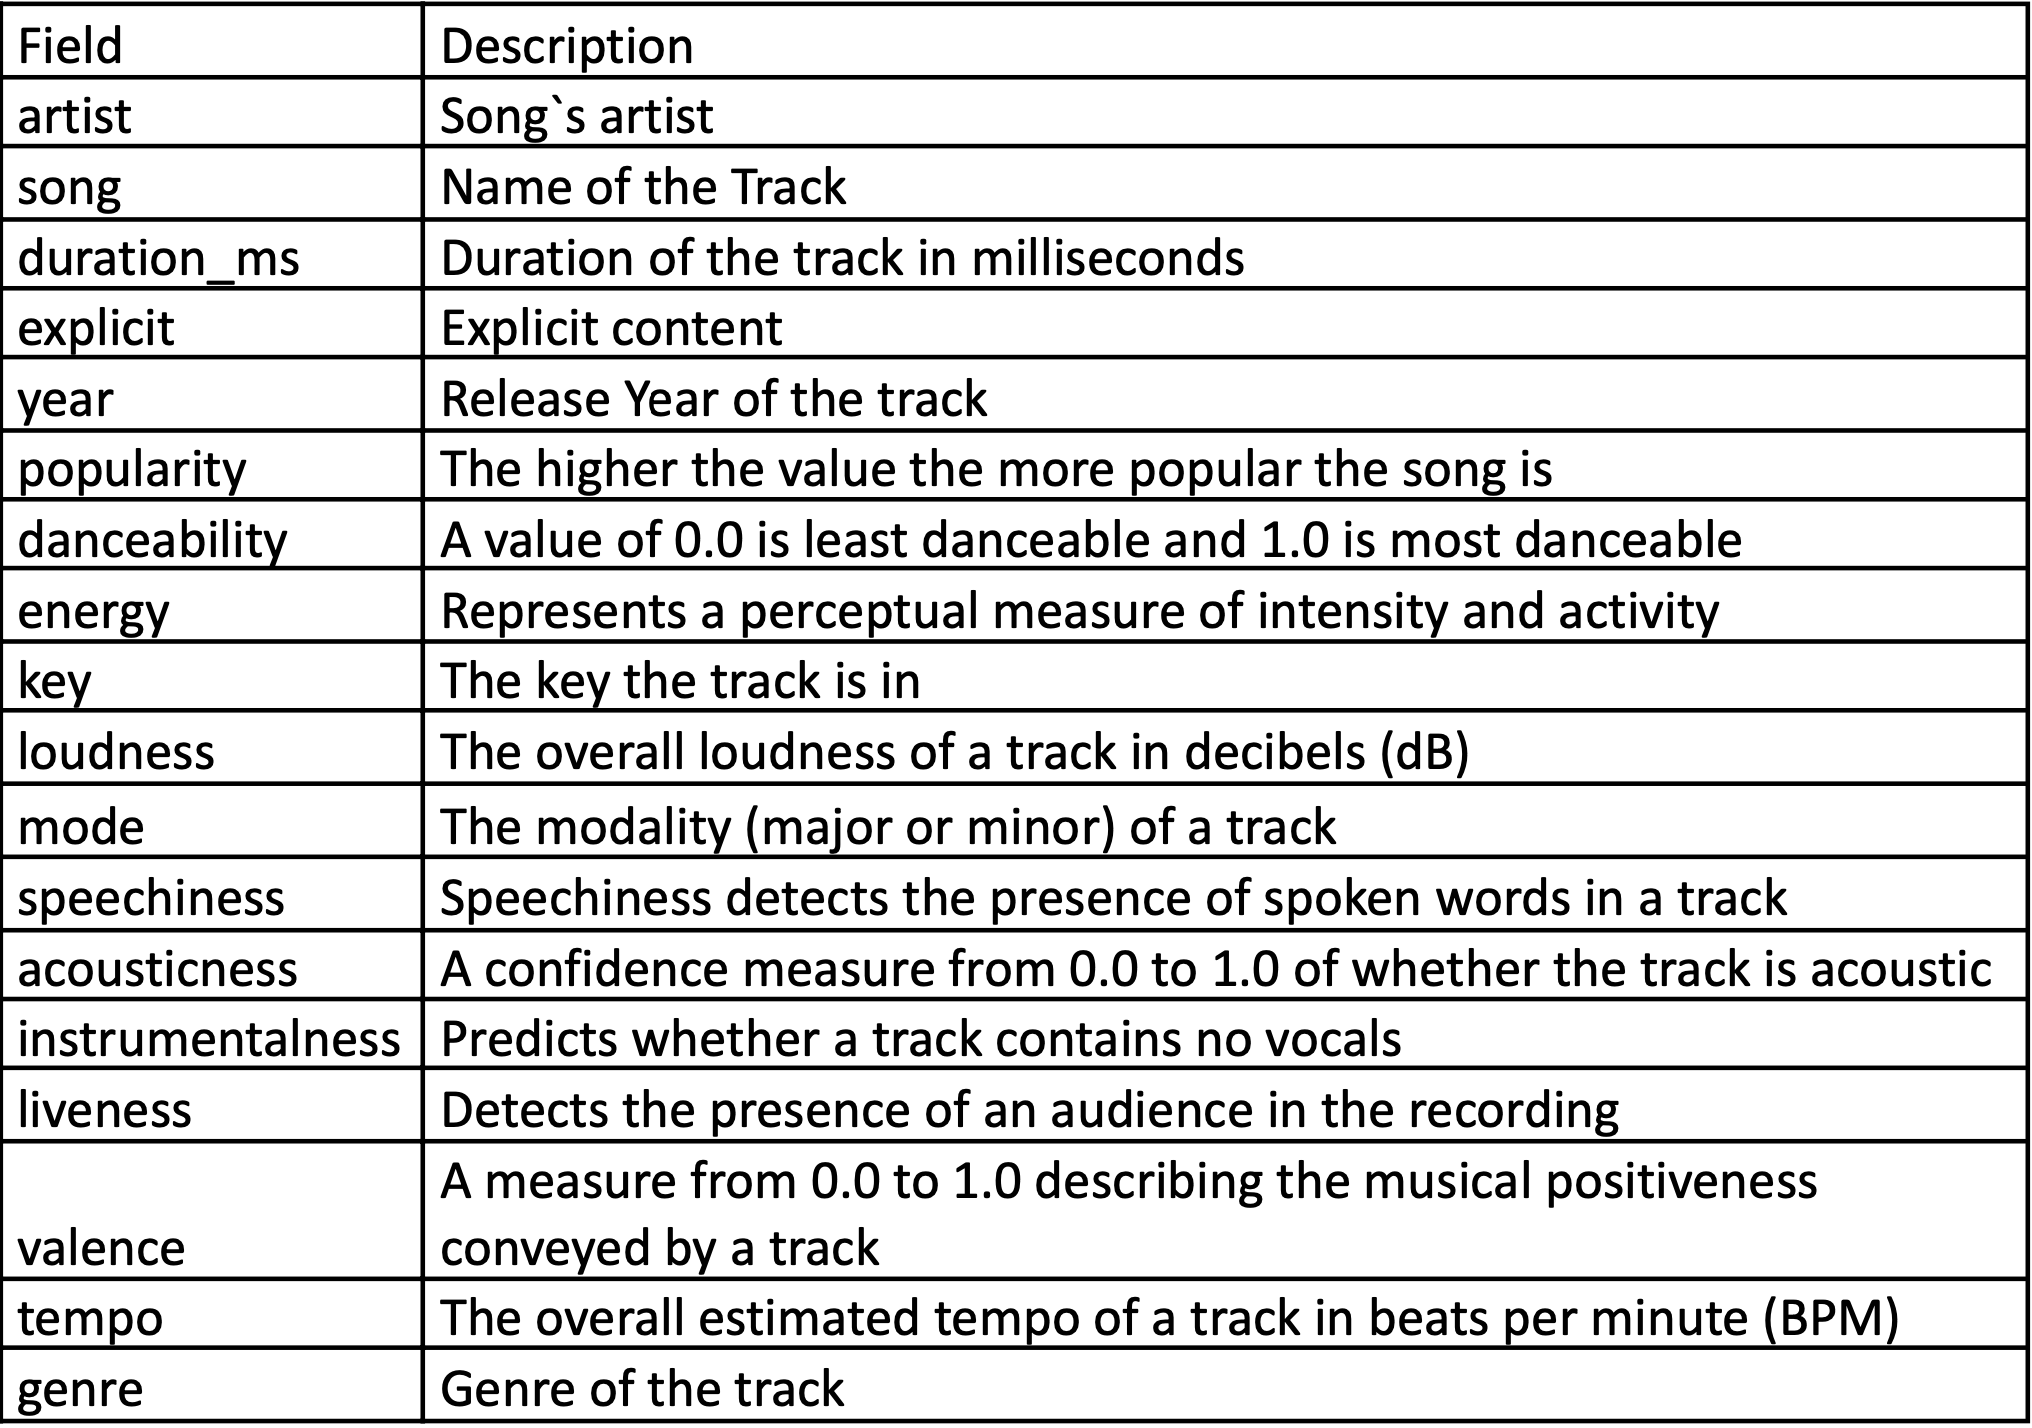

## Actividades

Responda cada una de las siguientes preguntas de negocio utilizando las técnicas y herramientas vistas en clase. En la medida de lo posible, responda cada pregunta aplicando una técnica estadística acompañada de una visualización.

In [7]:
def toggle_cell_code(button_id):
    """
    Adds a button to toggle (show/hide) the code cell but not the output. 
    
    Parameters
    ----------
    button_id : str
        An identifier for cells that will hide/show when button is pressed.
    """
    
    from IPython.display import display_html
    my_html = '''
    <button type="button" id="%s" onclick="code_toggle('%s')">Codigo</button>
    <script>
    function code_toggle(my_id) {
        // get the parent element for the cell code and output
        var p = $("#"+my_id);
        if (p.length==0) return;
        while (!p.hasClass("cell")) {
            p = p.parent();
            if (p.prop("tagName") =="body") return;
        }
    // get the cell code and toggle its value
    var cell_code = p.find(".input");
    cell_code.toggle();
    }
    </script>
    ''' %(button_id, button_id)
    return display_html(my_html, raw=True)

import warnings
warnings.filterwarnings('ignore')

Con el propósito de analizar la información contenida en la base de datos de **spotify** que contiene información acerca de las canciones más escuchadas en esta plataforma, se presenta a continuación el dataframe depurado, omitiendo los datos faltantes para eliminar el ruido que este pueda causar en los distintos análisis, los datos duplicados que puedan "inflar" algunos cálculos y consideraciones que se puedan realizar más adelante y finalmente se omitió la observación **1975**, debido  a que observaciones de esta fila se encontraban en columnas a las cuales no correspondían y no se tenía información de la columna **genre** en esta observación. Posteriormente, en ejercicios que involucraban el análisis respectivo de la variable **genre**, se procedio a discriminar y crear nuevas filas en donde esta variable se encontraba agrupada y para propósitos de agrupamiento, se suprimieron los espacios que contenian las observaciones de esta variable.

In [23]:
toggle_cell_code("Tabla")

from sklearn.impute import SimpleImputer
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotnine
from plotnine import *
import plotly.express as px

df = pd.read_csv('Data_Taller_1.csv',on_bad_lines='skip',sep=";")
df_Table=df.loc[df.loc[:,'year']!='TRUE'].dropna().drop_duplicates()
df_Table

Codigo

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,FALSE,2000,77.0,0.751,0.834,1.0,-5.444,0.0,0.0437,0.3000,1.77e-05,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,FALSE,1999,79.0,0.434,0.897,0.0,-4.918,1.0,0.0488,0.0103,0.0,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,FALSE,1999,66.0,0.529,0.496,7.0,-9.007,1.0,0.0290,0.1730,0.0,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,FALSE,2000,78.0,0.551,0.913,0.0,-4.063,0.0,0.0466,0.0263,1.35e-05,0.3470,0.544,119.992,"rock, metal"
5,Sisqo,Thong Song,253733,TRUE,1999,69.0,0.706,0.888,2.0,-6.959,1.0,0.0654,0.1190,9.64e-05,0.0700,0.714,121.549,"hip hop, pop, R&B"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,Post Malone,Goodbyes (Feat. Young Thug),174960,TRUE,2019,1.0,0.580,0.653,5.0,-3.818,1.0,0.0745,0.4470,0.0,0.1110,0.175,150.231,hip hop
1995,Jonas Brothers,Sucker,181026,FALSE,2019,79.0,0.842,0.734,1.0,-5.065,0.0,0.0588,0.0427,0.0,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,FALSE,2019,78.0,0.552,0.702,9.0,-5.707,1.0,0.1570,0.1170,2.06e-05,0.1050,0.564,169.994,pop
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,FALSE,2019,75.0,0.741,0.520,8.0,-7.513,1.0,0.0656,0.4500,1.97e-06,0.2220,0.347,102.998,pop


### Punto 1 (5 pts)

Describa el conjunto de datos, tipos de variables y destaque cualquier problema de calidad de datos y procesos de limpieza que deba implementar.

##### Descripción de variables:

**artist:** Variable que contiene el nombre del artista que compuso la canción. Esta variable es **cualitativa** con escala **nominal** debido a que esta variable presenta valores que no son númericos y que se utilizan para datos en categorías distintas y separadas que no admiten orden.

**song:** Variable que contiene la canción compuesta por el artista. Esta variable es **cualitativa** con escala **nominal** debido a que esta variable presenta valores que no son númericos y que se utilizan para datos en categorías distintas y separadas que no admiten orden.

**duration_ms:** Variable que contiene la duración en milisegundos de la canción. Debido a que esta variable está expresada númericamente y puede tomar cualquier valor dentro de un rango dado, se puede establecer como una variable **cuantitativa-continua**. Su escala es de **razón**, debido a que es una medida numérica en la cual el cero es un valor fijo y la diferencia entre los valores tiene sentido y es importante.

**explicit:** Variable dicotómica que indica sí la canción tiene contenido explicito **(TRUE)** o no **(FALSE)**. Esta variable es **cualitativa** con escala **nominal** debido a que esta variable presenta valores que no son númericos y que se utilizan para datos en categorías distintas y separadas que no admiten orden.

**year:** Variable que indica el año de lanzamiento de la canción. Esta variable es **cuantitativa-discreta** debido a que el conjunto de valores que esta puede tomar es finito-numerable, estableciendo una correspondencia biunívoca con el conjunto de los números enteros o subconjuntos de este. Su escala es de **Intervalo**, debido a que los datos llevan inherente un rango u ordenamiento, y el cero no implica ausencia del atributo.

**popularity:** Variable que indica la popularidad de la canción. Debido a que esta variable está expresada númericamente y puede tomar cualquier valor dentro de un rango dado, se puede establecer como una variable **cuantitativa-continua**. Su escala es de **razón**, debido a que es una medida numérica en la cual el cero es un valor fijo e implica ausencia del atributo y la diferencia entre los valores tiene sentido, siendo esta importante.

**danceability:** Variable que mide que tan bailable es la canción. Debido a que esta variable está expresada númericamente y puede tomar cualquier valor dentro de un rango dado, se puede establecer como una variable **cuantitativa-continua**. Su escala es de **razón**, debido a que es una medida numérica en la cual el cero es un valor fijo e implica ausencia del atributo(Menos bailable) y la diferencia entre los valores tiene sentido, siendo esta importante.

**energy:** Variable que contiene una medida perceptiva de intensidad y actividad. Debido a que esta variable está expresada númericamente y puede tomar cualquier valor dentro de un rango dado, se puede establecer como una variable **cuantitativa-continua**. Su escala es de **razón**, debido a que es una medida numérica en la cual el cero es un valor fijo e implica ausencia del atributo(Menos energico o activo) y la diferencia entre los valores tiene sentido, siendo esta importante.

**key:** Variable que indica la tonalidad en la cual se encuentra la canción. Esta variable es **cuantitativa-discreta** debido a que el conjunto de valores que esta puede tomar es finito-numerable, estableciendo una correspondencia biunívoca con el conjunto de los números enteros o subconjuntos de este. Su escala es de **Intervalo**, debido a que los datos llevan inherente un rango u ordenamiento, y el cero no implica ausencia del atributo.

**loudness:** Variable que indica el volumen general de una psita en decibelios(dB). Debido a que esta variable está expresada númericamente y puede tomar cualquier valor dentro de un rango dado, se puede establecer como una variable **cuantitativa-continua**. Su escala es de **razón**, debido a que es una medida numérica en la cual el cero es un valor fijo e implica ausencia del atributo y la diferencia entre los valores tiene sentido, siendo esta importante.

**mode:** Variable dicotómica que indica la modalidad mayor(**1**) o menor(**0**) de la pista. Esta variable es **cualitativa** con escala **nominal** debido a que esta variable presenta valores que no indican ningún orden de preferencia o secuencia de datos y que se utilizan para datos en categorías distintas y separadas.

**speechiness:** Variable que detecta la presencia de palabras habladas en una pista. Debido a que esta variable está expresada númericamente y puede tomar cualquier valor dentro de un rango dado, se puede establecer como una variable **cuantitativa-continua**. Su escala es de **razón**, debido a que es una medida numérica en la cual el cero es un valor fijo e implica ausencia del atributo y la diferencia entre los valores tiene sentido, siendo esta importante.

**acousticness:** Variable que contiene medida de confianza indicando sí la pista es acústicao no. Debido a que esta variable está expresada númericamente y puede tomar cualquier valor dentro de un rango dado, se puede establecer como una variable **cuantitativa-continua**. Su escala es de **razón**, debido a que es una medida numérica en la cual el cero es un valor fijo e implica ausencia del atributo.

**instrumentalness:** Variable que contiene predicciones sobre si una pista contiene voces o no.Debido a que esta variable está expresada númericamente y puede tomar cualquier valor dentro de un rango dado, se puede establecer como una variable **cuantitativa-continua**. Su escala es de **razón**, debido a que es una medida numérica en la cual el cero es un valor fijo e implica ausencia del atributo. 

**liveness:** Variable que contiene valores númericos que indican la presencia de audiencia durante la grabación de la pista. Debido a que esta variable está expresada númericamente y puede tomar cualquier valor dentro de un rango dado, se puede establecer como una variable **cuantitativa-continua**. Su escala es de **razón**, debido a que es una medida numérica en la cual el cero es un valor fijo e implica ausencia del atributo.  

**valence:** Variable que contiene valores númericos que indican una medición sobre la positividad musical trasmitida por una pista. Debido a que esta variable está expresada númericamente y puede tomar cualquier valor dentro de un rango dado, se puede establecer como una variable **cuantitativa-continua**. Su escala es de **razón**, debido a que es una medida numérica en la cual el cero es un valor fijo e implica ausencia del atributo.  

**tempo:** Variable que contiene estimaciones númericas del tempo general de una pista, medida en pulsaciones por minutos.Debido a que esta variable está expresada númericamente y puede tomar cualquier valor dentro de un rango dado, se puede establecer como una variable **cuantitativa-continua**. Su escala es de **razón**, debido a que es una medida numérica en la cual el cero es un valor fijo e implica ausencia del atributo.  

**genre:** Variable que contiene los diferentes géneros músicales de las canciones. Esta variable es **cualitativa** con escala **nominal** debido a que esta variable presenta valores que no indican ningún orden de preferencia o secuencia de datos y que se utilizan para datos en categorías distintas y separadas.

### Punto 1 (5 pts)

¿Cuál es el top 10 de artistas más activos de los últimos 10 años?

A continuación podremos ver la tabla donde evidenciamos al top de artistas más activos en los últimos 10 años, para lograr este objetivo se tomaron los años superiores al año **2010** y luego miramos con qué frecuencia se encuentra el artista en esta lista creada, evidenciando que **Drake**, **Ariana Grande** y **Calvin Harris** son los artistas qué más canciones escuchadas tienen en la lista en los últimos 10 años.

In [20]:
toggle_cell_code('Tabla_1')

df_Table['year']=df_Table['year'].astype(float, errors = 'raise')#Convertimos la variable año en entero
df_first_point=df_Table.loc[df_Table['year']>2012] #Se filtra la variable año por los valores superiores a 2012
df_first_point_1=df_first_point.groupby('artist').agg(Fecuencia_Años_Activos=('year','count')) #Miramos la cantidad de discos que el artista ha lanzado en los últimos 10 años
df_first_point_1=df_first_point_1['Fecuencia_Años_Activos'].sort_values(ascending=False).head(10) #Organizamos los valores de manera descendente y obtenemos los primeros 10 registros
df_first_point_1=df_first_point_1.rename_axis("artist").reset_index()
df_first_point_1

Codigo

,artist,Fecuencia_Años_Activos
0,Drake,16
1,Ariana Grande,13
2,Calvin Harris,9
3,Ed Sheeran,9
4,Taylor Swift,9
5,Selena Gomez,8
6,The Weeknd,8
7,Post Malone,8
8,One Direction,7
9,Sam Smith,7


Codigo

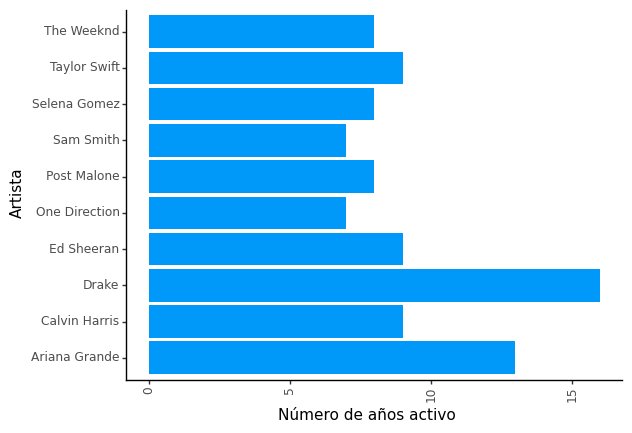

<ggplot: (8785381752757)>

In [21]:
toggle_cell_code('Tabla_15')

(ggplot( df_first_point_1, aes(x = 'artist', y = 'Fecuencia_Años_Activos')) +
       geom_bar(stat = "identity",fill = "#0099f9") +
    theme_classic()+
    coord_flip()+
    theme(axis_text_x= element_text(angle = 90))+
labs(x = "Artista",
       y = "Número de años activo"))


### Punto 2 (10 pts)

¿Cómo se diferencian las canciones de los géneros de Latin y Folk/Acoustic en relación con su duración? Halle la diferencia del tiempo promedio de ambos géneros.

In [22]:
toggle_cell_code('Tabla_2')

df_genre=df_Table.assign(genre=df_Table.genre.str.split(',')).explode('genre') #Dividimos los generos que se encuentran agrupados en cada una de las observaciones
df_genre['genre'] = df_genre['genre'].str.strip() #Removemos espacios en blanco en la variable 'genre'
df_genre['duration_ms']=df_genre['duration_ms'].astype(float, errors = 'raise') #Convertimos la variable 'duration_ms' a valor númerico
df_latin=df_genre.loc[df_genre['genre']=='latin'] #Filtramos los registros de la variable género que corresponden a latin
df_latin_mean=df_latin[['duration_ms']].mean() #Calculamos la duración promedio de las canciones de género latin
df_Folk_Acoustic=df_genre.loc[df_genre['genre']=='Folk/Acoustic'] #Filtramos los registros de la variable género que corresponden a Folk/Acoustic
df_Folk_Acoustic_mean=df_Folk_Acoustic[['duration_ms']].mean() #Calculamos la duración promedio de las canciones de género Folk/Acoustic
print(df_latin_mean-df_Folk_Acoustic_mean) #Se calcula e imprime la diferencia promedio de ambos géneros


Codigo

duration_ms    6400.054918
dtype: float64


En relación con su duración, la duración promedio de canciones pertenecientes al género **latin** es de 226584 milisegundos apróximadamente y la duración promedio de canciones pertenecientes al género **Folk/Acoustic** es de 220184 milisegundos apróximadamente. En promedio, las canciones pertenecientes al género **latin** duran 6400 milisegundos más que las pertenecientes al género **Folk/Acoustic**.

### Punto 3 (15 pts)

Halle el top 5 de los géneros del 2019 según la cantidad de canciones. ¿Cómo ha variado la cantidad de canciones del Top de géneros en los años 2000, 2005, 2010, 2015, 2019?

A continuación se presenta el top de géneros por canciones de acuerdo a la lista de **Spotify** de canciones más escuchadas en el año **2019**:

In [741]:
toggle_cell_code('Tabla_3')

df_year_19=df_genre.loc[df_genre['year']==2019] #Obtenemos los valores que corresponden al año 2019
df_year__19_2=df_year_19.groupby('genre').agg(Top=('genre','count')) #Obtenemos la cantidad de canciones por géero en el año 2019
df_year__19_2['Top'].sort_values(ascending=False).head(5) #Organizamos los valores de manera descendente y obtenemos los primeros 5 registros


Codigo

genre
pop                 62
hip hop             35
Dance/Electronic    20
R&B                  9
latin                8
Name: Top, dtype: int64

Donde podemos evidenciar que el género **pop** fue el más escuchado en el año **2019**.

El top de géneros en los años **2000**,**2005**,**2010**,**2015** y **2019** ha disminuido la cantidad de canciones del top desde el año **2010** hasta el año **2019**. Sin embargo ha disminuido en menor proporción con respecto al aumento que hubo en la cantidad de canciones desde el año **2000** hasta el año **2010**, siendo este año el que más concentró cantidad de canciones.

In [730]:
toggle_cell_code('Tabla_4')

df_all_Y=df_genre.loc[df_genre.genre.isin(['pop','hip hop','Dance/Electronic','R&B','latin'])&df_genre.year.isin([2000,2005,2010,2015,2019])]
df_summary=df_all_Y.groupby('year').agg(Frecuencia=('genre','count'))
df_summary


Codigo

,Frecuencia
year,
2000.0,102
2005.0,166
2010.0,198
2015.0,154
2019.0,134


Codigo

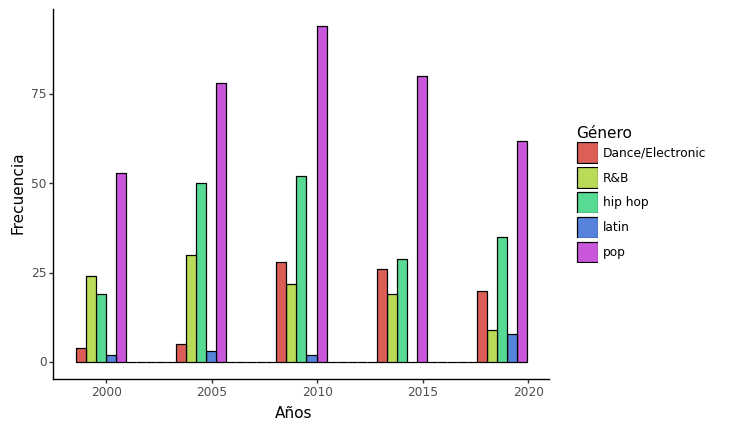

<ggplot: (8787082287189)>

In [731]:
toggle_cell_code('Tabla_5')

(ggplot(df_all_Y,aes(x="year",fill="genre"))+
geom_histogram(position = 'dodge', colour="black")+
 theme_classic()+
labs(x = "Años",
       y = "Frecuencia")+
 guides(fill=guide_legend(title="Género")))

### Punto 4 (15 pts)

¿Cómo ha sido la progresión de nuevos artistas? Asuma que un artista nuevo es aquel del cual no se tiene registros pasados y solo es nuevo durante el primer año de aparición.

La progesión de nuevos artitas en la lista de canciones más escuchadas de **Spotify** sólo tuvo un cambio considerable en los dos primeros periodos de tiempos, en el cual hubo un aumento considerable de artistas nuevos, sin embargo con el pasar del tiempo está progresión ha sido casi constante, teniendo únicamente un decremento significativo en lo que respecta a los periodos de años posteriores al del **2000-2001**.

In [732]:
toggle_cell_code('Tabla_6')

min_year=df_Table.groupby(['artist'],as_index=False)['year'].min()
min_year['Frecuency']=min_year['year'].map(min_year['year'].value_counts())
min_year=min_year.iloc[:, 1:3].drop_duplicates()
min_year['year']=min_year['year'].astype(float, errors = 'raise')

period_length =2
start_year = 1998
end_year = 2020
df = min_year[(min_year['year'] >= 1998) & (min_year['year'] <= 2020)]
year_range = end_year - start_year
modulo = year_range % period_length

if modulo == 0:
    final_start = end_year - period_length
else:
    final_start = end_year - modulo
final_end = end_year + 1

starts = np.arange(start_year, final_start, period_length).tolist()

tuples = [(start, start+period_length) for start in starts]

tuples.append(tuple([final_start, final_end]))
bins = pd.IntervalIndex.from_tuples(tuples, closed='left')

original_labels = list(bins.astype(str))
new_labels = ['{} - {}'.format(b.strip('[)').split(', ')[0], int(b.strip('[)').split(', ')[1])-1) for b in original_labels]
label_dict = dict(zip(original_labels, new_labels))

df['PERIOD'] = pd.cut(df['year'], bins=bins, include_lowest=True, precision=0)
df['PERIOD'] = df['PERIOD'].astype("str")
df = df.replace(label_dict)

df = df.groupby('PERIOD').agg(Frecuencia=('Frecuency','sum'))

df


Codigo

,Frecuencia
PERIOD,
1998 - 1999,31
2000 - 2001,115
2002 - 2003,81
2004 - 2005,82
2006 - 2007,75
2008 - 2009,64
2010 - 2011,69
2012 - 2013,67
2014 - 2015,79


Codigo

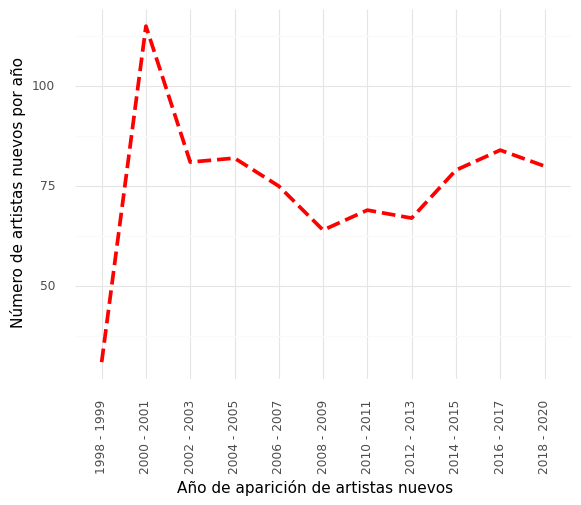

<ggplot: (8787087679621)>

In [733]:
toggle_cell_code('Tabla_7')

freq_by_period = (df
  .reset_index())
  
(ggplot(freq_by_period,aes(x = 'PERIOD', y = 'Frecuencia')) +
 geom_line( size = 1.5, color="red", group = 1,linetype="dashed")+
 theme_minimal()+
 theme(axis_text_x= element_text(angle = 90))+
labs(x = "Año de aparición de artistas nuevos",
       y = "Número de artistas nuevos por año"))



### Punto 5 (15 pts)

Grafique la progresión de la popularidad promedio por género y por año. Concluya sobre la gráfica, ej: ¿existen tendencias?

A continuación se muestran dos gráficas en la cual se evidencia que no existe tendencia en la progresión de la popularidad promedio por género y por año. 

Codigo

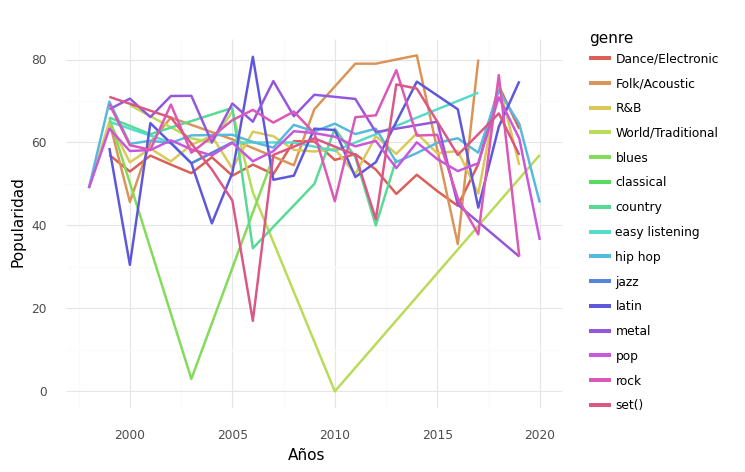

<ggplot: (8787067093965)>

In [734]:
toggle_cell_code('Tabla_9')
popolarity_progre=df_genre.groupby(['genre','year'],as_index=False)['popularity'].mean()

(ggplot(popolarity_progre, aes(x = 'year', y = 'popularity'))+
geom_line(aes(color = 'genre'), size = 1)+
theme_minimal()+
labs(x = "Años",
       y = "Popularidad"))


Codigo

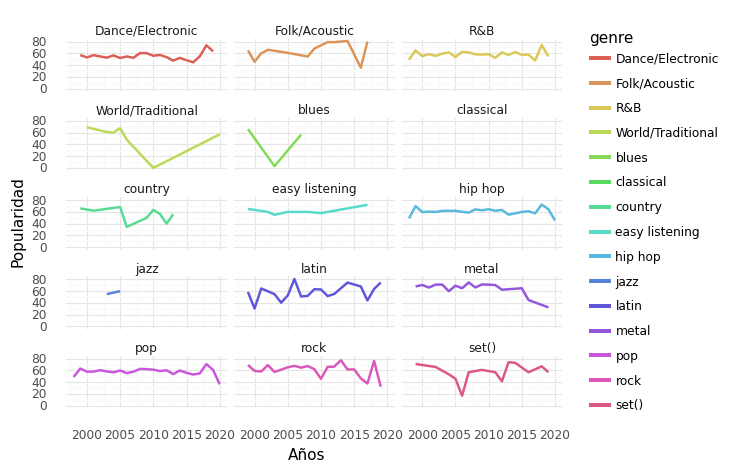

<ggplot: (8787066874423)>

In [735]:
toggle_cell_code('Tabla_10')

(ggplot(popolarity_progre, aes(x = 'year', y = 'popularity'))+
geom_line(aes(color = 'genre'), size = 1)+
theme_minimal()+
facet_wrap('~genre',ncol = 3)+
labs(x = "Años",
       y = "Popularidad")+
 guides(fill=guide_legend(title="Género")))

### Punto 6 (20 pts)

Compare los géneros Pop y Rock según sus características de: energy, valence y tempo. Concluya sobre su análisis.

Codigo

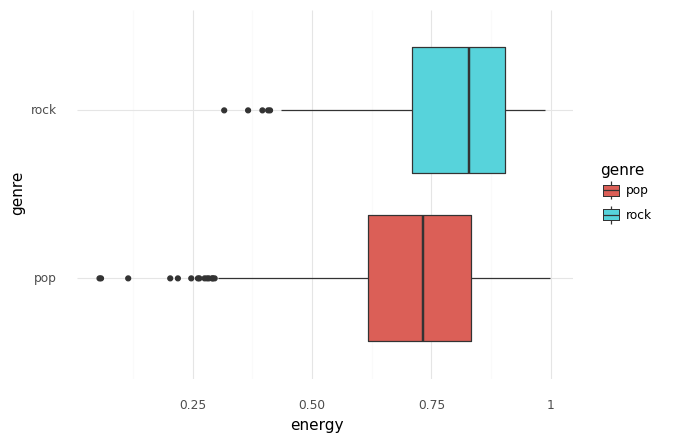

<ggplot: (8787065383400)>

In [736]:
toggle_cell_code('Tabla_11')

df_genre_2=df_genre.loc[df_genre.genre.isin(['pop','rock'])]

(ggplot(df_genre_2, aes(x='genre', y='energy',fill='genre')) + 
geom_boxplot()+
coord_flip()+
theme_minimal())


De la gráfica anterior, podemos concluir que en promedio, las canciones de rock son más enérgicas e intensas que las canciones de pop, sin embargo podemos notar que este género es bastante similar en intensidad al género rock, sin considerar algunas canciones de este género que se presentan como datos atípicos tienen poca energía e intensidad.

Codigo

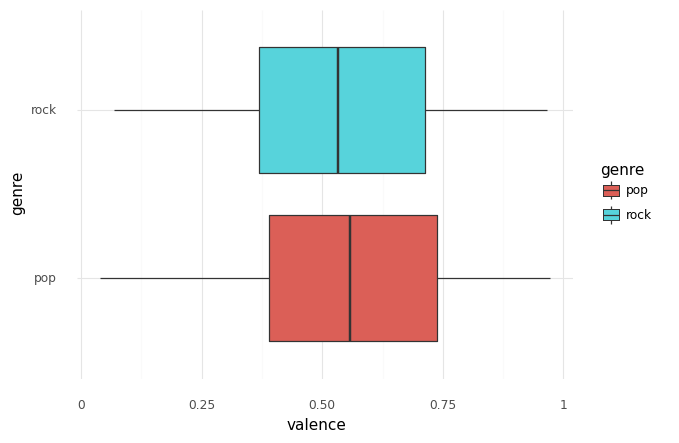

<ggplot: (8787062923027)>

In [737]:
toggle_cell_code('Tabla_12')

df_genre_2=df_genre.loc[df_genre.genre.isin(['pop','rock'])]

(ggplot(df_genre_2, aes(x='genre', y='valence',fill='genre')) + 
geom_boxplot()+
coord_flip()+
theme_minimal())

De la gráfica anterior, podemos concluir que en cuanto a la distribución de los datos concernientes a la variable **valance**, ambos géneros son similares en cuanto a la positividad músical trasmitida por pista.

Codigo

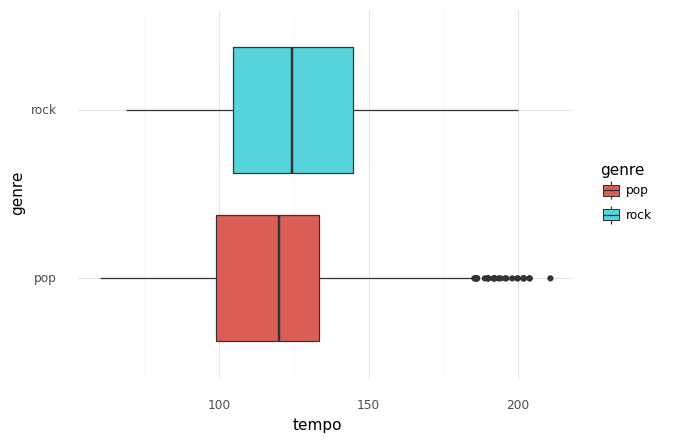

<ggplot: (8787084573850)>

In [738]:
toggle_cell_code('Tabla_13')
df_genre_2=df_genre.loc[df_genre.genre.isin(['pop','rock'])]

(ggplot(df_genre_2, aes(x='genre', y='tempo',fill='genre')) + 
geom_boxplot()+
coord_flip()+
theme_minimal())

En cuanto a la variable **tempo**, podemos evidenciar que el género **rock** trasmite más pulsaciones por minúto que las canciones  del género **pop** en promedio, sin emabrgo existen canciones del género pop que se presentan como datos atípicos que trasmiten más pulsaciones por minúto que cualquier canción de rock.

### Punto 7 (15 pts)

Plantee una pregunta de negocio de su interés, ya sea por tipo de música, artistas u otra dimensión, mediante la cual se analicen al menos 3 variables del dataset y concluya.

### ¿Son los géneros con contenido explicito menos populares que los géneros sin este contenido?

Codigo

                genre explicit  popularity
0    Dance/Electronic    FALSE   54.306061
1    Dance/Electronic     TRUE   57.348837
2       Folk/Acoustic    FALSE   59.789474
3       Folk/Acoustic     TRUE   68.000000
4                 R&B    FALSE   58.221154
5                 R&B     TRUE   59.447154
6   World/Traditional    FALSE   53.444444
7   World/Traditional     TRUE   57.000000
8               blues    FALSE   45.500000
9           classical    FALSE   63.000000
10            country    FALSE   55.166667
11            country     TRUE   62.000000
12     easy listening    FALSE   61.428571
13            hip hop    FALSE   61.323263
14            hip hop     TRUE   62.354369
15               jazz    FALSE   57.500000
16              latin    FALSE   59.400000
17              latin     TRUE   62.500000
18              metal    FALSE   66.836364
19              metal     TRUE   72.777778
20                pop    FALSE   58.729060
21                pop     TRUE   60.055556
22         

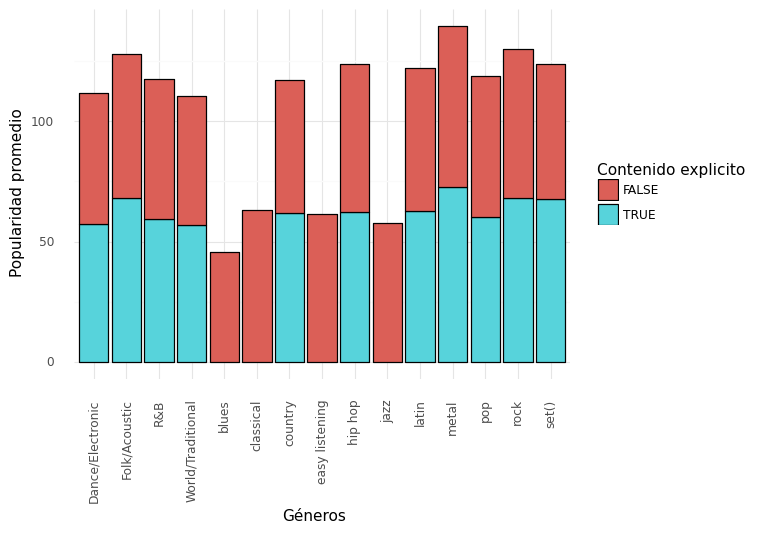

<ggplot: (8787065584276)>

In [739]:
toggle_cell_code('Tabla_14')

explicit=df_genre.groupby(['genre','explicit'],as_index=False)['popularity'].mean()
print(explicit)
(ggplot(explicit, aes(x='genre', y='popularity',fill='explicit')) +
  geom_bar(stat='identity',colour="black")+
 theme_minimal()+
 theme(axis_text_x= element_text(angle = 90))+
 labs(x = "Géneros",
       y = "Popularidad promedio")+
 guides(fill=guide_legend(title="Contenido explicito"))
  #geom_text(aes(label='popularity'), vjust=-0.3, size=3.5)+
)

A simple vista no se puede evidenciar una diferencia significativa entre la popularidad media de los géneros que poseen contenido explicito y las que no presentan esta caracteristica, sin embargo  en la tabla de frecuencias observando por género, se puede notar que hay una **ligera preferencia** por las canciones que poseen contenido explicito. Siendo este un ejercicio descriptivo, podemos deducir que los géneros con contenido explicito no son menos populares que los géneros sin este contenido a partir del calculo de la popularidad media por género. Para deducir si está variable de contenido explicito tiene una incidencia directa con la popularidad, se podría tratar de buscar el grado de afectación que tiene una variable sobre otra en un análisis predictivo posterior.